<a href="https://colab.research.google.com/github/kanjicool/forecast_pm_2_5/blob/main/Custom_LSTM_PM25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
df = pd.read_csv("clean_pm25_data.csv", parse_dates=["timestamp"])

In [ ]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00.000,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00.000,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00.000,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00.000,96.426316,23.070175,21.912281,28.028070


In [ ]:
# ลบไมโครวินาทีออกจาก timestamp
df["timestamp"] = df["timestamp"].str.replace(r"\.\d{3,}", "", regex=True)

In [ ]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


In [ ]:
print(df.dtypes)

timestamp       object
humidity       float64
pm_10          float64
pm_2_5         float64
temperature    float64
dtype: object


In [ ]:
print(df.columns)

Index(['timestamp', 'humidity', 'pm_10', 'pm_2_5', 'temperature'], dtype='object')


In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
print(df.dtypes)

timestamp      datetime64[ns]
humidity              float64
pm_10                 float64
pm_2_5                float64
temperature           float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672752 entries, 0 to 672751
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   timestamp    672752 non-null  datetime64[ns]
 1   humidity     672752 non-null  float64       
 2   pm_10        672752 non-null  float64       
 3   pm_2_5       672752 non-null  float64       
 4   temperature  672752 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 25.7 MB


In [ ]:
print(df.dtypes)

timestamp      datetime64[ns]
humidity              float64
pm_10                 float64
pm_2_5                float64
temperature           float64
dtype: object


In [ ]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


In [ ]:
nat_row = df[df["timestamp"].isna()]
print(nat_row)

Empty DataFrame
Columns: [timestamp, humidity, pm_10, pm_2_5, temperature]
Index: []


In [ ]:
print(f"Missing timestamp: {df['timestamp'].isna().mean() * 100:.2f}%")


Missing timestamp: 0.00%


In [ ]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


 แปลงข้อมูลจากรายชั่วโมง → รายวัน (ใช้ค่าเฉลี่ย)

In [ ]:
df.set_index("timestamp", inplace=True)  # ตั้ง timestamp เป็น index
df_daily = df.resample("D").mean()  # Resample รายวัน
df_daily.reset_index(inplace=True)  # รีเซ็ต index ถ้าต้องการคอลัมน์ timestamp กลับมา

print(df_daily.head())  # ตรวจสอบผลลัพธ์


   timestamp   humidity      pm_10     pm_2_5  temperature
0 2021-02-11  78.085506  17.296982  15.090510    29.147623
1 2021-02-12  83.773975  18.518441  16.375654    27.888929
2 2021-02-13  79.863308  24.047247  21.543936    27.849907
3 2021-02-14  79.903002  36.705885  31.860588    27.446633
4 2021-02-15  79.229596  38.337904  33.055341    27.470763


In [ ]:
df_daily

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-02-11,78.085506,17.296982,15.090510,29.147623
1,2021-02-12,83.773975,18.518441,16.375654,27.888929
2,2021-02-13,79.863308,24.047247,21.543936,27.849907
3,2021-02-14,79.903002,36.705885,31.860588,27.446633
4,2021-02-15,79.229596,38.337904,33.055341,27.470763
...,...,...,...,...,...
1457,2025-02-07,74.429496,24.319329,19.937410,28.912610
1458,2025-02-08,74.175832,25.215313,20.366785,29.052255
1459,2025-02-09,74.699870,25.545159,19.176782,28.887772
1460,2025-02-10,73.144507,24.671367,21.371354,29.258430


# Preprocessing data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ใช้ humidity pm_10 pm_2_5 และ temperature เป็น feature
df = df_daily[['humidity', 'pm_10', 'pm_2_5', 'temperature']].copy()
print(df)


       humidity      pm_10     pm_2_5  temperature
0     78.085506  17.296982  15.090510    29.147623
1     83.773975  18.518441  16.375654    27.888929
2     79.863308  24.047247  21.543936    27.849907
3     79.903002  36.705885  31.860588    27.446633
4     79.229596  38.337904  33.055341    27.470763
...         ...        ...        ...          ...
1457  74.429496  24.319329  19.937410    28.912610
1458  74.175832  25.215313  20.366785    29.052255
1459  74.699870  25.545159  19.176782    28.887772
1460  73.144507  24.671367  21.371354    29.258430
1461  78.923388  24.767707  24.917256    28.147838

[1462 rows x 4 columns]


In [ ]:
print(df.isna().sum())

humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64


In [ ]:
df.interpolate(method='linear', inplace=True)

ควรแบ่งข้อมูลเป็นชุด train/test ก่อนพรีโพรเซส (เช่น 80:20) มิฉะนั้นอาจเกิด data leakage

In [ ]:
# แบ่ง Train/Test (เช่น 70% train, 30% test)
train_size = int(len(df) * 0.7)
train_data = df.iloc[:train_size].values
test_data = df.iloc[train_size:].values
print(train_size)
print(train_data)
print(test_data)

1023
[[78.08550558 17.29698192 15.09051003 29.14762301]
 [83.7739752  18.51844147 16.37565395 27.888929  ]
 [79.86330774 24.04724738 21.54393556 27.84990713]
 ...
 [87.87548628 17.53855274  8.72195073 27.19173065]
 [89.88582292 23.06008835 15.17210271 27.01283563]
 [88.11823057 19.38332926 10.21690303 27.27859913]]
[[89.51140164 18.76456938 10.30990866 27.32318868]
 [88.74910119 17.17153445 10.28425603 26.92527865]
 [87.78495782 14.61583124  6.23447637 27.39638231]
 ...
 [74.69987026 25.54515876 19.17678173 28.88777214]
 [73.14450689 24.67136733 21.37135395 29.25842969]
 [78.92338758 24.76770684 24.91725561 28.14783831]]


In [ ]:
# ใช้ MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data) # ใช้ fit_transform กับ train เท่านั้น
test_scaled = scaler.transform(test_data)

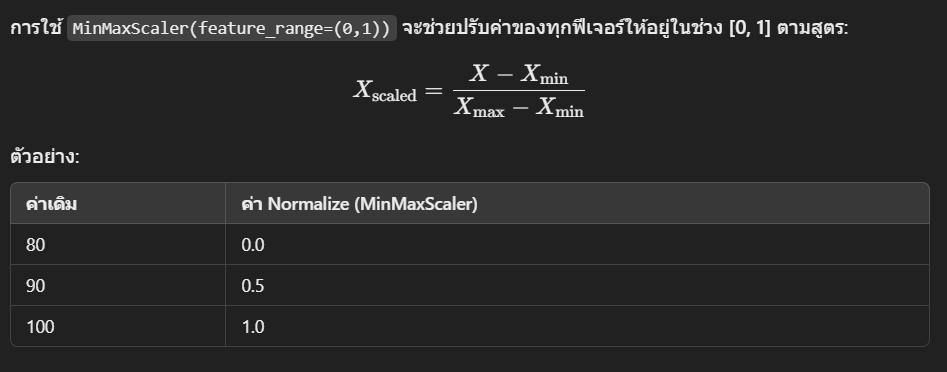

X(dataset) = [ 10, 11, 18, 15, 20]

# ฟังก์ชันสร้าง sequence

In [ ]:
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length]) # input sequence
    y.append(data[i+seq_length, 2]) # target column 2 = pm 2.5
  return np.array(X), np.array(y)

seq_length = 14
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

print(f"Train Shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test Shape: X={X_test.shape}, y={y_test.shape}")

Train Shape: X=(1009, 14, 4), y=(1009,)
Test Shape: X=(425, 14, 4), y=(425,)


**Custom LSTM Cell**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import RNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2

class CustomLSTMCell(tf.keras.layers.Layer):
  def __init__(self, units, dropout_rate):
    super(CustomLSTMCell, self).__init__()
    self.units = units
    self.dropout_rate = dropout_rate
    self.state_size = [units, units]  # กำหนดขนาดของ state (h_t, C_t)

  def build(self, input_shape):
    input_dim = input_shape[-1]

    # Regularization
    reg = l2(0.001)

    # สร้าง Weights และ Bias สำหรับแต่ละ Gate
    self.W_f = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
                               regularizer=reg, name="W_f")
    self.b_f = self.add_weight(shape=(self.units,), initializer="zeros", name="b_f")

    self.W_i = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
                               regularizer=reg, name="W_i")
    self.b_i = self.add_weight(shape=(self.units,), initializer="zeros", name="b_i")

    self.W_C = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
                               regularizer=reg, name="W_C")
    self.b_C = self.add_weight(shape=(self.units,), initializer="zeros", name="b_C")

    self.W_o = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
                               regularizer=reg, name="W_o")
    self.b_o = self.add_weight(shape=(self.units,), initializer="zeros", name="b_o")

  def call(self, inputs, states, training=False):
    h_prev, C_prev = states # รับค่า Hidden State และ Cell state ก่อนหน้า

    # รวม inputs กับ h_prev
    concat = tf.concat([inputs, h_prev], axis=1)

    # Dropout สำหรับ input (เฉพาะตอน training)
    if training:
      concat = tf.nn.dropout(concat, rate=self.dropout_rate)

    # คำนวณ Forget Gate (ควบคุมว่าควรลืมข้อมูลเก่าแค่ไหน)
    f_t = tf.sigmoid(tf.matmul(concat, self.W_f) + self.b_f)

    # คำนวณ Input Gate (ควบคุมว่าควรรับข้อมูลใหม่แค่ไหน)
    i_t = tf.sigmoid(tf.matmul(concat, self.W_i) + self.b_i)

    # คำนวณ Candidate Memory Cell (สร้างค่าที่จะเพิ่มเข้าไปใน Cell State)
    C_tilde = tf.tanh(tf.matmul(concat, self.W_C) + self.b_C)

    # คำนวณ Output Gate (ควบคุมว่าควรส่งค่าจาก Cell State ไปยัง Hidden State แค่ไหน)
    o_t = tf.sigmoid(tf.matmul(concat, self.W_o) + self.b_o)

    # อัปเดตค่า Cell State ใหม่ (C_t)
    C_t = f_t * C_prev + (i_t * C_tilde)

    # คำนวณ Hidden State ใหม่ (h_t)
    h_t = o_t * tf.tanh(C_t)

    return h_t, [h_t, C_t]




```
self.W_f = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_f")
```


อธิบายการกำหนดค่า weight

- input_dim = 8 (มี 8 features)
- self.units = 16 (มี 16 หน่วย LSTM)
ขนาดของ W_f จะเป็น (8 + 16, 16) = (24, 16)

- initializer="glorot_uniform" `กำหนดวิธีการสุ่มค่าเริ่มต้นของ Weight
"glorot_uniform" หรือ Xavier Initialization` เป็นเทคนิคที่ช่วยให้ weight ไม่เล็กหรือใหญ่เกินไป ทำให้โมเดลเรียนรู้ได้ดีขึ้น

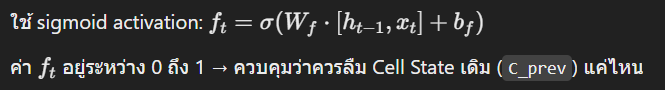

# สร้างและคอมไพล์โมเดล LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# โมเดลหลักใช้ CustomLSTMCell
model = Sequential()

# Layer 1
model.add(RNN(CustomLSTMCell(128, dropout_rate=0.3), return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Layer 2
# model.add(RNN(CustomLSTMCell(32, dropout_rate=0.3), return_sequences=False))
# model.add(BatchNormalization())

# Fully Connected Layer สำหรับการทำนายค่า PM2.5
model.add(Dense(1, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

# ตั้งค่า Optimizer และ Learning Rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# คอมไพล์โมเดล
model.compile(optimizer=optimizer, loss='mean_absolute_error')

# แสดงโครงสร้างของโมเดล
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rnn_1 (RNN)                          │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,737 (268.50 KB)

 Trainable params: 68,481 (267.50 KB)

 Non-trainable params: 256 (1.00 KB)

Callbacks ช่วยให้โมเดลเรียนรู้ได้ดีขึ้น

- EarlyStopping หยุดการเทรนเมื่อค่า loss ไม่ลดลง
- ReduceLROnPlateau ลดค่า learning rate หาก loss ไม่ลด

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# หยุดการเทรนหาก val_loss ไม่ลดลงต่อเนื่อง 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ลดค่า learning rate เมื่อ val_loss ไม่ลดลงต่อเนื่อง 5 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

callbacks = [early_stopping, reduce_lr]


การฝึกโมเดล (Training)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,  # กำหนดจำนวนรอบการเทรน
    batch_size=32,  # จำนวนตัวอย่างต่อ batch
    validation_data=(X_test, y_test),  # ใช้ชุดทดสอบตรวจสอบประสิทธิภาพ
    callbacks=callbacks,
    verbose=1  # แสดงผลการเทรน
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.8788 - val_loss: 0.6022 - learning_rate: 1.0000e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.7303 - val_loss: 0.5666 - learning_rate: 1.0000e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.6682 - val_loss: 0.5441 - learning_rate: 1.0000e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6199 - val_loss: 0.5304 - learning_rate: 1.0000e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.5930 - val_loss: 0.5159 - learning_rate: 1.0000e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.5917 - val_loss: 0.5016 - learning_rate: 1.0000e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.5536 - val_loss: 0.4893 - learning_rate: 1.0000e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.5467 - val_loss: 0.4776 - learning_rate: 1.0000e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.5181 - val_loss: 0.4662 - learning_

# การทำนายและประเมินผล

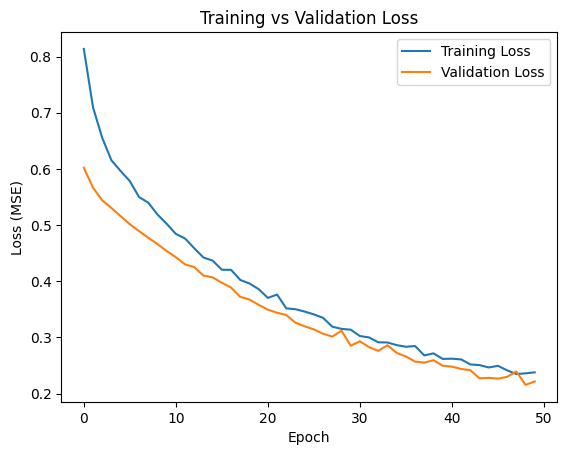

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


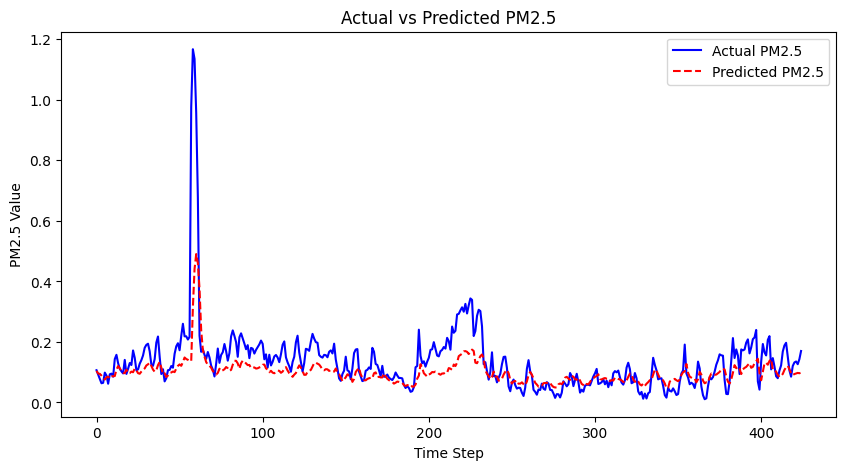

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual PM2.5", color="blue")
plt.plot(y_pred, label="Predicted PM2.5", color="red", linestyle="dashed")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Value")
plt.title("Actual vs Predicted PM2.5")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


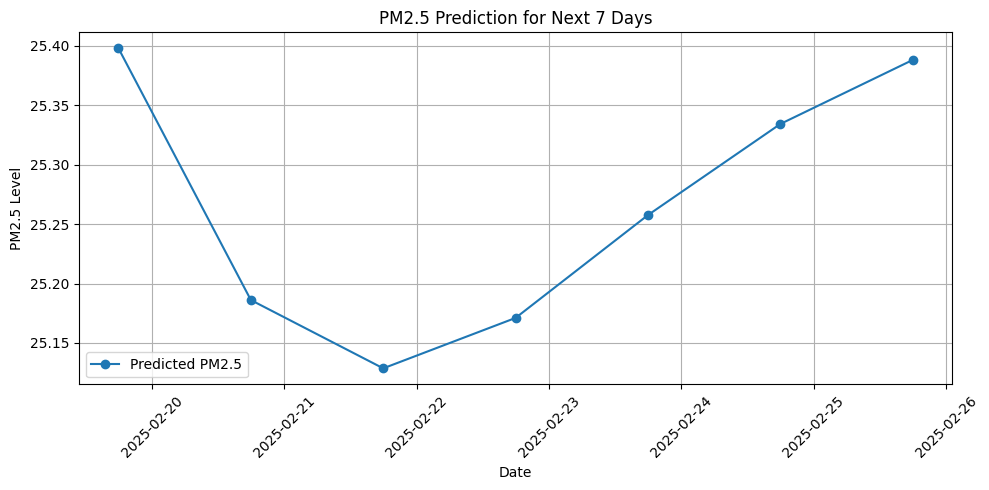

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ใช้ข้อมูล 7 วันล่าสุดจาก test set เป็น seed
future_inputs = X_test[-1]  # ข้อมูล 7 วันล่าสุดจาก test set
predictions = []

# ทำนาย 7 วันข้างหน้า
for _ in range(7):
    next_day_pred = model.predict(future_inputs.reshape(1, future_inputs.shape[0], future_inputs.shape[1]))[0, 0]
    predictions.append(next_day_pred)

    # อัปเดต input sequence โดยเพิ่มค่าทำนายใหม่และลบค่าที่เก่าที่สุดออก
    next_input = np.roll(future_inputs, shift=-1, axis=0)
    next_input[-1, 2] = next_day_pred  # อัปเดตค่า pm_2.5 ที่ต้องทำนาย
    future_inputs = next_input

# แปลงค่ากลับเป็นสเกลเดิม (inverse transform)
predictions_real = scaler.inverse_transform(np.column_stack([np.zeros((7, 3)), predictions]))[:, 3]

# ใช้วันที่ปัจจุบันเป็นวันเริ่มต้น (วันนี้)
current_date = pd.Timestamp.now()  # ดึงวันที่ปัจจุบัน
predicted_dates = [current_date + pd.Timedelta(days=i) for i in range(1, 8)]

# Plot กราฟ
plt.figure(figsize=(10, 5))
plt.plot(predicted_dates, predictions_real, marker='o', linestyle='-', label="Predicted PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Prediction for Next 7 Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


การประเมินผลโมเดลเพิ่มเติม

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ทำนายค่า
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# คำนวณ Error Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Train MSE: 0.0065, RMSE: 0.0809, MAE: 0.0443, R²: 0.8041
Test MSE: 0.0081, RMSE: 0.0903, MAE: 0.0486, R²: 0.3803


ค่าที่ลองปรับ


https://docs.google.com/spreadsheets/d/1yWkq7cC3KYUapJQHjMrWFCcLl91T-fFDsqyHJ6joJGQ/edit?usp=sharing

TODO
- หา data ที่มากกว่านี้และมี feature มากกว่านี้
- Hyperparameter tuning: ใช้เครื่องมืออย่าง GridSearchCV หรือ RandomizedSearchCV เพื่อหาค่า hyperparameters ที่ดีที่สุด
- ลองใช้ โมเดลอื่น เช่น GRU (Gated Recurrent Unit) ซึ่งบางครั้งสามารถให้ผลลัพธ์ที่ดีกว่า LSTM
- เพิ่มจำนวน epochs: ถ้าโมเดลยังไม่ได้ฝึกจนถึงจุดที่ดีที่สุด คุณอาจจะเพิ่มจำนวน epochs เพื่อให้โมเดลเรียนรู้มากขึ้น
- ลองใช้ LSTM หลายชั้น หรือ เพิ่มจำนวน neurons ใน LSTM layers
- ปรับ learning rate: คุณอาจจะลองปรับค่า learning rate ของ optimizer (เช่น ลดค่า learning rate เพื่อให้โมเดลเรียนรู้ได้ละเอียดขึ้น)


ต้องการดูค่าของ Forget Gate, Input Gate, และ Output Gate ในแต่ละขั้นตอนของโมเดล คุณสามารถดึง weights ของ LSTM layer ออกมาตรวจสอบได้

คุณสามารถทดลองใช้หลาย ๆ ค่า seq_length เช่น 7, 30, 60, และดูผลลัพธ์ว่า โมเดลทำงานได้ดีขึ้น หรือ ประสิทธิภาพของการทำนายดีขึ้น เมื่อเปลี่ยนค่า seq_length หรือไม่